# Multiple Linear Regression

In [2]:
# Basic Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Libraries for Regression

In [6]:
from sklearn.model_selection import train_test_split  #for train test split 
from pandas.core.common import random_state           # for Random state
from sklearn.linear_model import LinearRegression     # for linear regression model
from sklearn.metrics import mean_squared_error, r2_score   # for finding measures for accuracy

In [8]:
# library for Multiple linear Regression

from sklearn import linear_model

In [14]:
df = pd.read_csv('homeprices.csv')
df

,Area (sq ft),Bedrooms,Age (years),Price ($)
0,2600,3.0,20,"550,000"
1,3000,4.0,15,"565,000"
2,3200,NaN,18,"610,000"
3,3600,3.0,30,"595,000"
4,4000,5.0,8,"760,000"
...,...,...,...,...
94,13300,6.0,8,"760,000"
95,13400,5.0,8,"810,000"
96,13500,4.0,10,"850,000"
97,13600,3.0,5,"900,000"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area (sq ft)  99 non-null     int64  
 1   Bedrooms      98 non-null     float64
 2   Age (years)   99 non-null     int64  
 3   Price ($)     99 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


<Axes: ylabel='Bedrooms'>

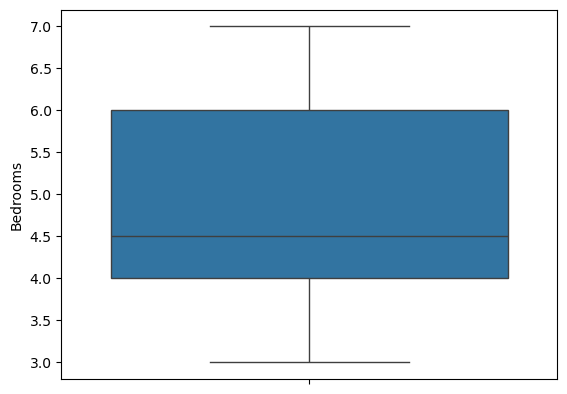

In [24]:
# In order to fill in the missing value in Bedroom column we will need to see the data distribution
sns.boxplot(df['Bedrooms'])

In [28]:
df.Bedrooms = df.Bedrooms.fillna(df.Bedrooms.median())
df

,Area (sq ft),Bedrooms,Age (years),Price ($)
0,2600,3.0,20,"550,000"
1,3000,4.0,15,"565,000"
2,3200,4.5,18,"610,000"
3,3600,3.0,30,"595,000"
4,4000,5.0,8,"760,000"
...,...,...,...,...
94,13300,6.0,8,"760,000"
95,13400,5.0,8,"810,000"
96,13500,4.0,10,"850,000"
97,13600,3.0,5,"900,000"


In [33]:
new_df = df.drop('Price ($)',axis='columns')
new_df

,Area (sq ft),Bedrooms,Age (years)
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.5,18
3,3600,3.0,30
4,4000,5.0,8
...,...,...,...
94,13300,6.0,8
95,13400,5.0,8
96,13500,4.0,10
97,13600,3.0,5


# 3D Plot - Visualization of Multiple Variables

In [37]:
# Basic Libraries for 3D plot

import plotly.express as px
import plotly.graph_objects as go

In [48]:
df = df.rename(columns={'Area (sq ft)': 'area',	'Bedrooms' : 'bedrooms' , 'Age (years)' : 'age', 'Price ($)' : 'price'})

In [50]:
df

,area,bedrooms,age,price
0,2600,3.0,20,"550,000"
1,3000,4.0,15,"565,000"
2,3200,4.5,18,"610,000"
3,3600,3.0,30,"595,000"
4,4000,5.0,8,"760,000"
...,...,...,...,...
94,13300,6.0,8,"760,000"
95,13400,5.0,8,"810,000"
96,13500,4.0,10,"850,000"
97,13600,3.0,5,"900,000"


In [87]:
df['price'] = df['price'].str.replace(',', '').astype(float)

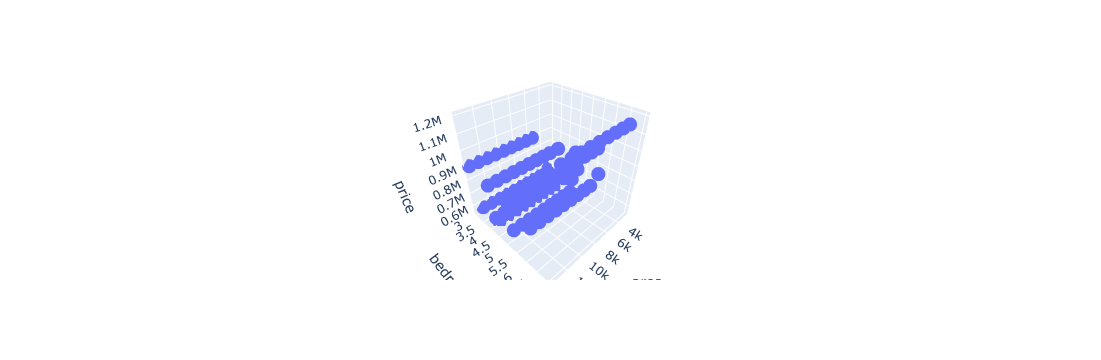

In [89]:
fig = px.scatter_3d(df, x=df.area,y=df.bedrooms,z= df.price)
fig.show()

# Fitting of Multiple Linear Regresson model, Splitting the data into train/test and fiding best model

In [91]:
# defining the dependent and independent model
y = df.price
x = df.iloc[:,:3]

In [93]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.5,18
3,3600,3.0,30
4,4000,5.0,8
...,...,...,...
94,13300,6.0,8
95,13400,5.0,8
96,13500,4.0,10
97,13600,3.0,5


In [95]:
y

0      550000.0
1      565000.0
2      610000.0
3      595000.0
4      760000.0
        ...    
94     760000.0
95     810000.0
96     850000.0
97     900000.0
98    1000000.0
Name: price, Length: 99, dtype: float64

In [97]:
# Splitting the data in train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [99]:
#applying the model
reg = linear_model.LinearRegression()

In [101]:
reg.fit(x,y)

LinearRegression()

In [103]:
reg.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

In [107]:
error = y_test - y_pred_test

In [109]:
error

26     73888.753653
86     56377.538220
2     -34407.363299
55    -54256.057346
75    -60093.129157
92    -85151.036866
16     76807.289559
73    164978.841557
54   -147664.539962
94   -159338.683584
53    170815.913368
91    -96429.591860
78    -22611.188133
13    182490.056989
7      -3926.312408
30    -47375.057379
22    -64721.285528
24   -138908.932246
33    176652.985179
8      -2181.436795
Name: price, dtype: float64

In [111]:
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

MSE =  11659223399.661917
R2 =  0.42964893558177586
RMSE =  107977.88384508152


# As we have very low R2 score we will try to find best value for rendom state in order to maximize our R2 score / model accuracy

In [116]:
accuracy = []
stats = []
rscr = []
lr = LinearRegression()
for i in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2= r2_score(y_test, y_pred)
    rscr.append(r2)
    stats.append(i)

In [118]:
for a, b in zip(stats, rscr):
    print(a, b)

0 0.42964893558177586
1 0.7657114610331596
2 0.6872413888679799
3 0.7391808139925211
4 0.6668094337734967
5 0.7080746510989899
6 0.6691846309413769
7 0.7512764665404233
8 0.7014101230180034
9 0.6658395846266998
10 0.7389942129881174
11 0.7779847395652744
12 0.7946548095649804
13 0.7715855180281769
14 0.8014657562229728
15 0.7387147139008754
16 0.7374608958862271
17 0.7842310985163693
18 0.7472261574791883
19 0.8060539565704041
20 0.7070287030479281
21 0.7526523995797891
22 0.7303053267081019
23 0.7223533872408145
24 0.6420815449283119
25 0.7464736288576259
26 0.7299773595080052
27 0.6612629926922959
28 0.7645002065984114
29 0.7659508261922918
30 0.8268435380894247
31 0.5750086545744428
32 0.7918586682442229
33 0.7985169058343425
34 0.7436919744048285
35 0.7967771703579145
36 0.7530130748241467
37 0.6791982066589217
38 0.603293351519641
39 0.7770413308184736
40 0.7872349544376955
41 0.7798199300805111
42 0.573477944846025
43 0.7953354643893369
44 0.7604037261815694
45 0.7732719153686458

In [120]:
max(rscr)

0.8330769103786981

In [124]:
rscr.index(0.8330769103786981)   # This will tell us the best Random state value

56

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 56)
reg = linear_model.LinearRegression()
reg.fit(x,y)
reg.fit(x_train,y_train)
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)
print('MSE = ', mean_squared_error(y_test, y_pred_test ))
print('R2 = ', r2_score(y_test, y_pred_test))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

MSE =  6564459153.219722
R2 =  0.8330769103786981
RMSE =  81021.3499839377


# Correlation matrix

In [129]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

<Axes: >

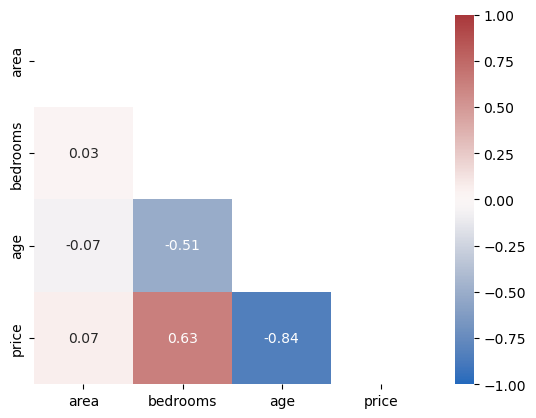

In [131]:
sns.heatmap(df.corr().round(2), annot =True, vmin=-1, vmax=1, center=0, cmap='vlag', mask=mask)

In [133]:
print("Y=", reg.intercept_,"+",reg.coef_,"* x")

Y= 758867.3307761538 + [ 8.27967253e-01  4.38668811e+04 -1.62089152e+04] * x
